In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [4]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
# 모델 돌리기 위해서 범주형변수 숫자로 변환해줘야됨!
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'].values)
data['Department'] = encoder.fit_transform(data['Department'].values)
data['EducationField'] = encoder.fit_transform(data['EducationField'].values)
data['Gender'] = encoder.fit_transform(data['Gender'].values)
data['JobRole'] = encoder.fit_transform(data['JobRole'].values)
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'].values)
data['OverTime'] = encoder.fit_transform(data['OverTime'].values)
data['Attrition']= encoder.fit_transform(data['Attrition'].values)

In [7]:
dataset = data.copy()
target_name = 'Attrition' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))


랜덤 포레스트 정확도 : 0.8810


# X_test 데이터셋의 RF y=0/1 을 Pr(y/x)로 대체

In [18]:
rf_clf.predict_proba(X_test)

array([[0.85, 0.15],
       [0.94, 0.06],
       [0.48, 0.52],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.46, 0.54],
       [0.83, 0.17],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.76, 0.24],
       [0.6 , 0.4 ],
       [0.75, 0.25],
       [0.93, 0.07],
       [0.8 , 0.2 ],
       [0.88, 0.12],
       [0.83, 0.17],
       [0.69, 0.31],
       [0.82, 0.18],
       [0.85, 0.15],
       [0.92, 0.08],
       [0.87, 0.13],
       [0.91, 0.09],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.91, 0.09],
       [0.77, 0.23],
       [0.63, 0.37],
       [0.93, 0.07],
       [0.82, 0.18],
       [0.99, 0.01],
       [0.91, 0.09],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.8 , 0.2 ],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.77, 0.23],
       [0.78, 0.22],
       [0.94, 0.06],
       [0.81, 0.19],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.95, 0.05],
       [0.42, 0.58],
       [0.97, 0.03],
       [0.61, 0.39],
       [0.72,

In [ ]:
pred_df = pd.DataFrame(pred)
pred_df

,0
0,0
1,0
2,1
3,0
4,0
...,...
289,0
290,0
291,0
292,0


In [ ]:
proba = pd.DataFrame(rf_clf.predict_proba(X_test))
proba

,0,1
0,0.85,0.15
1,0.94,0.06
2,0.48,0.52
3,0.93,0.07
4,0.98,0.02
...,...,...
289,0.87,0.13
290,0.87,0.13
291,0.88,0.12
292,0.81,0.19


In [ ]:
proba.columns=['proba_0','proba_1']
proba

,proba_0,proba_1
0,0.85,0.15
1,0.94,0.06
2,0.48,0.52
3,0.93,0.07
4,0.98,0.02
...,...,...
289,0.87,0.13
290,0.87,0.13
291,0.88,0.12
292,0.81,0.19


In [ ]:
proba = pd.concat([proba,pred_df],axis=1)
proba.columns=['proba_0','proba_1','predict']
proba

,proba_0,proba_1,predict
0,0.85,0.15,0
1,0.94,0.06,0
2,0.48,0.52,1
3,0.93,0.07,0
4,0.98,0.02,0
...,...,...,...
289,0.87,0.13,0
290,0.87,0.13,0
291,0.88,0.12,0
292,0.81,0.19,0


In [ ]:
X_test['Attrition'] = y_test

In [ ]:
X_test = X_test[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
X_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,0,2,866,2,5,3,3,4,1,...,3,4,0,6,4,3,5,4,1,3
184,53,0,2,1084,1,13,2,3,4,0,...,3,3,2,5,3,3,4,2,1,3
1222,24,1,2,240,0,22,1,0,4,1,...,3,3,1,1,2,3,1,0,0,0
67,45,0,2,1339,1,7,3,1,2,1,...,3,3,1,25,2,3,1,0,0,0
220,36,0,2,1396,1,5,2,1,4,1,...,3,4,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,0,2,304,2,2,3,4,4,1,...,4,3,0,6,5,3,6,5,1,4
560,34,0,2,167,1,8,5,1,2,0,...,3,3,1,7,3,3,0,0,0,0
945,50,0,2,1322,1,28,3,1,4,0,...,3,2,0,25,2,3,3,2,1,2
522,37,0,2,1225,1,10,2,1,4,1,...,3,1,0,4,2,3,1,0,0,0


In [ ]:
X_test_index = X_test.index
X_test_index

Int64Index([1041,  184, 1222,   67,  220,  494,  430,  240,  218,   49,
            ...
             316, 1458, 1070,  682,  394,  567,  560,  945,  522,  651],
           dtype='int64', length=294)

In [ ]:
X_test = X_test.reset_index(drop=True)
X_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,28,0,2,866,2,5,3,3,4,1,...,3,4,0,6,4,3,5,4,1,3
1,53,0,2,1084,1,13,2,3,4,0,...,3,3,2,5,3,3,4,2,1,3
2,24,1,2,240,0,22,1,0,4,1,...,3,3,1,1,2,3,1,0,0,0
3,45,0,2,1339,1,7,3,1,2,1,...,3,3,1,25,2,3,1,0,0,0
4,36,0,2,1396,1,5,2,1,4,1,...,3,4,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,34,0,2,304,2,2,3,4,4,1,...,4,3,0,6,5,3,6,5,1,4
290,34,0,2,167,1,8,5,1,2,0,...,3,3,1,7,3,3,0,0,0,0
291,50,0,2,1322,1,28,3,1,4,0,...,3,2,0,25,2,3,3,2,1,2
292,37,0,2,1225,1,10,2,1,4,1,...,3,1,0,4,2,3,1,0,0,0


In [ ]:
rf_proba = pd.concat([X_test,proba],axis=1)

In [ ]:
rf_proba

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,proba_0,proba_1,predict
0,28,0,2,866,2,5,3,3,4,1,...,6,4,3,5,4,1,3,0.85,0.15,0
1,53,0,2,1084,1,13,2,3,4,0,...,5,3,3,4,2,1,3,0.94,0.06,0
2,24,1,2,240,0,22,1,0,4,1,...,1,2,3,1,0,0,0,0.48,0.52,1
3,45,0,2,1339,1,7,3,1,2,1,...,25,2,3,1,0,0,0,0.93,0.07,0
4,36,0,2,1396,1,5,2,1,4,1,...,16,3,4,13,11,3,7,0.98,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,34,0,2,304,2,2,3,4,4,1,...,6,5,3,6,5,1,4,0.87,0.13,0
290,34,0,2,167,1,8,5,1,2,0,...,7,3,3,0,0,0,0,0.87,0.13,0
291,50,0,2,1322,1,28,3,1,4,0,...,25,2,3,3,2,1,2,0.88,0.12,0
292,37,0,2,1225,1,10,2,1,4,1,...,4,2,3,1,0,0,0,0.81,0.19,0


In [ ]:
rf_proba.set_index(X_test_index, inplace=True)

In [ ]:
rf_proba

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,proba_0,proba_1,predict
1041,28,0,2,866,2,5,3,3,4,1,...,6,4,3,5,4,1,3,0.85,0.15,0
184,53,0,2,1084,1,13,2,3,4,0,...,5,3,3,4,2,1,3,0.94,0.06,0
1222,24,1,2,240,0,22,1,0,4,1,...,1,2,3,1,0,0,0,0.48,0.52,1
67,45,0,2,1339,1,7,3,1,2,1,...,25,2,3,1,0,0,0,0.93,0.07,0
220,36,0,2,1396,1,5,2,1,4,1,...,16,3,4,13,11,3,7,0.98,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,0,2,304,2,2,3,4,4,1,...,6,5,3,6,5,1,4,0.87,0.13,0
560,34,0,2,167,1,8,5,1,2,0,...,7,3,3,0,0,0,0,0.87,0.13,0
945,50,0,2,1322,1,28,3,1,4,0,...,25,2,3,3,2,1,2,0.88,0.12,0
522,37,0,2,1225,1,10,2,1,4,1,...,4,2,3,1,0,0,0,0.81,0.19,0


In [ ]:
cri_others = pd.read_csv('cri_others.csv', index_col = 0)
cri_others

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1369,28,1,2,1475,2,13,2,2,4,0,...,3,4,0,6,0,3,2,0,2,2
1168,24,0,1,567,1,2,1,5,1,0,...,3,3,0,6,2,3,6,3,1,3
453,26,1,1,426,0,17,4,1,2,0,...,3,2,1,8,2,2,7,7,1,0
479,24,1,1,1287,1,7,3,1,1,0,...,3,4,1,6,4,3,6,3,1,2
331,27,0,0,210,2,1,1,2,3,1,...,3,4,1,6,0,3,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,25,1,2,240,2,5,3,2,3,1,...,3,4,0,6,1,3,6,4,0,3
440,34,1,1,988,0,23,3,0,2,0,...,3,3,3,11,2,3,3,2,0,2
1459,29,0,2,1378,1,13,2,4,4,1,...,3,1,1,10,2,3,4,3,0,3
132,31,1,2,542,2,20,3,1,2,0,...,3,3,1,4,2,3,2,2,2,2


In [ ]:
rf_cri= pd.merge(rf_proba[['proba_0','proba_1','predict']], cri_others,
         left_index=True, 
         right_index=True)
rf_cri

,proba_0,proba_1,predict,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
494,0.46,0.54,1,34,0,2,204,2,14,3,...,3,4,2,8,3,3,8,2,0,6
363,0.42,0.58,1,33,1,2,350,2,5,3,...,3,2,0,1,2,3,1,0,0,0
309,0.85,0.15,0,31,0,2,691,1,5,4,...,3,3,1,6,4,3,5,2,0,3
881,0.84,0.16,0,32,0,1,1316,1,2,2,...,3,4,0,10,2,3,8,7,0,7
192,0.80,0.20,0,35,1,2,556,1,23,2,...,3,1,0,8,1,3,1,0,0,1
948,0.69,0.31,0,30,0,2,634,1,17,4,...,4,4,2,9,2,3,9,1,0,8
1167,0.72,0.28,0,35,1,2,763,2,15,2,...,3,4,2,7,2,2,2,2,2,2
107,0.64,0.36,0,25,1,2,240,2,5,3,...,3,4,0,6,1,3,6,4,0,3
239,0.72,0.28,0,32,1,2,515,1,1,3,...,3,4,0,4,2,1,3,2,1,2
1422,0.73,0.27,0,35,0,2,1490,1,11,4,...,3,3,1,5,3,3,2,2,2,2


In [ ]:
rf_cri = rf_cri[['proba_0','proba_1', 'predict','Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
rf_cri

,proba_0,proba_1,predict,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
494,0.46,0.54,1,0,34,2,204,2,14,3,...,3,4,2,8,3,3,8,2,0,6
363,0.42,0.58,1,1,33,2,350,2,5,3,...,3,2,0,1,2,3,1,0,0,0
309,0.85,0.15,0,0,31,2,691,1,5,4,...,3,3,1,6,4,3,5,2,0,3
881,0.84,0.16,0,0,32,1,1316,1,2,2,...,3,4,0,10,2,3,8,7,0,7
192,0.80,0.20,0,1,35,2,556,1,23,2,...,3,1,0,8,1,3,1,0,0,1
948,0.69,0.31,0,0,30,2,634,1,17,4,...,4,4,2,9,2,3,9,1,0,8
1167,0.72,0.28,0,1,35,2,763,2,15,2,...,3,4,2,7,2,2,2,2,2,2
107,0.64,0.36,0,1,25,2,240,2,5,3,...,3,4,0,6,1,3,6,4,0,3
239,0.72,0.28,0,1,32,2,515,1,1,3,...,3,4,0,4,2,1,3,2,1,2
1422,0.73,0.27,0,0,35,2,1490,1,11,4,...,3,3,1,5,3,3,2,2,2,2


In [ ]:
# X_test 데이터셋의 RF y=0/1 을 Pr(y/x)로 대체
rf_cri.to_csv('rf_cri.csv')

# Pr(y/x) to Regression Tree 



In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree # tree visualization
import sklearn

In [31]:
cri_others = pd.read_csv('cri_others.csv',index_col=0)
cri_others.reset_index(drop=True, inplace=True)
target_name = 'Attrition' # target name을 꼭 입력해주시길 바랍니다.
colnm = cri_others.columns
X = cri_others.loc[:,colnm [colnm != target_name]]
y = cri_others.loc[:, target_name]

In [32]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,28,2,1475,2,13,2,2,4,0,84,...,3,4,0,6,0,3,2,0,2,2
1,24,1,567,1,2,1,5,1,0,32,...,3,3,0,6,2,3,6,3,1,3
2,26,1,426,0,17,4,1,2,0,58,...,3,2,1,8,2,2,7,7,1,0
3,24,1,1287,1,7,3,1,1,0,55,...,3,4,1,6,4,3,6,3,1,2
4,27,0,210,2,1,1,2,3,1,73,...,3,4,1,6,0,3,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,25,2,240,2,5,3,2,3,1,46,...,3,4,0,6,1,3,6,4,0,3
84,34,1,988,0,23,3,0,2,0,43,...,3,3,3,11,2,3,3,2,0,2
85,29,2,1378,1,13,2,4,4,1,46,...,3,1,1,10,2,3,4,3,0,3
86,31,2,542,2,20,3,1,2,0,71,...,3,3,1,4,2,3,2,2,2,2


In [65]:
# fit regression model
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42) # criterion default : mse
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

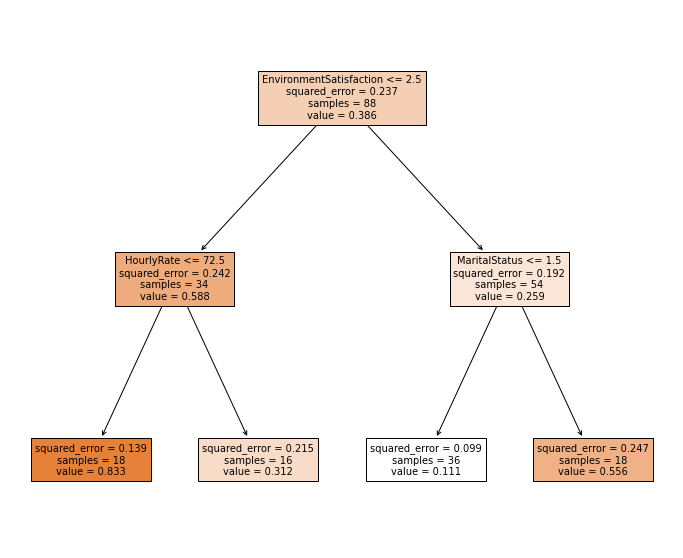

In [66]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names= reg_tree.feature_names_in_, filled=True)
plt.show()

# 최적의 파라미터(Random Forest)


In [ ]:
dataset = data.copy()
target_name = 'Attrition' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10 ,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.8444


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=42)

In [ ]:
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도 : 0.8707


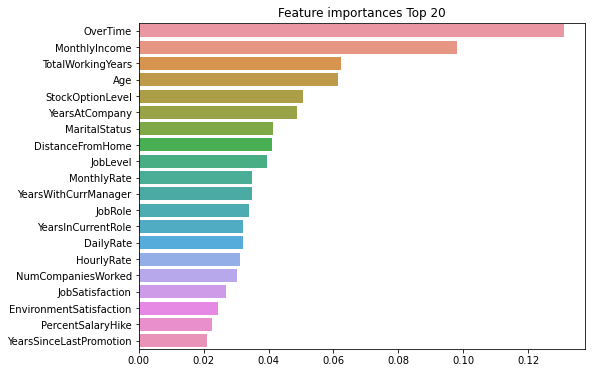

In [ ]:

%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()

# GradientBoosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()
gb_clf=GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f} 초'.format(time.time()-start_time))



GBM 정확도 : 0.8912
GBM 수행 시간 : 0.4 초


In [ ]:
params = {
    'n_estimators':[10, 500],
    'learning_rate' : [0.05,0.1]
}
gb_grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
gb_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', gb_grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도 : 0.8605


In [ ]:
gb_pred=gb_grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

GBM 정확도 : 0.8844


In [ ]:
params = gb_grid_cv.best_params_
params

{'learning_rate': 0.05, 'n_estimators': 500}

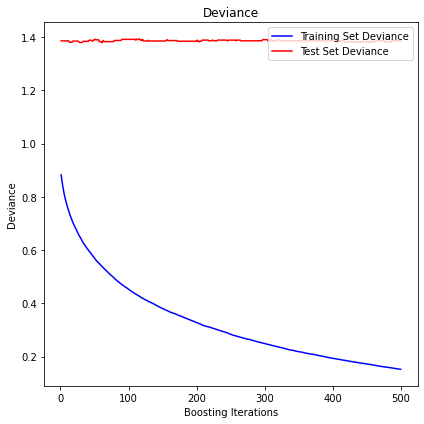

In [ ]:
# train, test deviance graph
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_grid_cv.best_estimator_.staged_predict(X_test)):
    test_score[i] = gb_grid_cv.best_estimator_.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_grid_cv.best_estimator_.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred - knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('KNN 예측 정확도 : {:.4f}'.format(accuracy))

KNN 예측 정확도 : 0.8810


In [15]:
params = {
    'n_neighbors':list(range(1,31)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', ' manhattan', 'minkowski']
}
knn_clf = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn_clf, param_grid = params, cv= 3, n_jobs=-1)
knn_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', knn_grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(knn_grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
최고 예측 정확도 : 0.8376


In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=20, metric = 'euclidean', weights='distance',n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred - knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('KNN 예측 정확도 : {:.4f}'.format(accuracy))

KNN 예측 정확도 : 0.8810
